
# **Diamonds Price Prediction**
### Content Overview:

* Initial Data Loading & Overview
* Data Quality Assessment & Cleaning
* Exploratory Data Analysis (EDA)
* Feature Engineering
* Exploring Categorical Data
* Encoding
* Feature Scaling & Preprocessing Pipelines
* Model Performance Analysis
* DNN Pipeline

## Importing Libraries
> First, let's import all the necessary libraries required for our analysis

In [ ]:
# libraries for Data analysis
import pandas as pd
import numpy as np

# libraries for Data analysis
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler

# Statistical analysis
from scipy import stats

# Setting styles for plots
sns.set_theme(style="whitegrid")
%matplotlib inline

##(1) Initial Data Loading & Overview

 - Dataset Loading & Structure

> Add blockquote



In [ ]:
# Loading the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"
df = pd.read_csv(url)


# Checking the Structure

df_dimensions = df.shape                       # Dimensions (rows, columns)
print("DataSet Shape:",df_dimensions)

column_names = df.columns                      # Get column labels
print("Column names:",column_names)


df[df["carat"]>2]

DataSet Shape: (53940, 10)
Column names: Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


,carat,cut,color,clarity,depth,table,price,x,y,z
12246,2.06,Premium,J,I1,61.2,58.0,5203,8.10,8.07,4.95
13002,2.14,Fair,J,I1,69.4,57.0,5405,7.74,7.70,5.36
13118,2.15,Fair,J,I1,65.5,57.0,5430,8.01,7.95,5.23
13757,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36
13991,2.01,Fair,I,I1,67.4,58.0,5696,7.71,7.64,5.17
...,...,...,...,...,...,...,...,...,...,...
27741,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21
27742,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84
27744,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11


- Data Types Analysis

In [ ]:
# to return the data types of each column we can use two function (info(), dtypes())

cols_type = df.dtypes                       # Get data types of columns
print("Columns Type:",cols_type)

df_info = df.info()                         # Getting Information about the DataFrame
print("df_info :",df_info )

Columns Type: carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
df_info : None


- Initial Content Examination

>Review sample records to understand the actual data content and formats

In [ ]:
Random_data= df.sample(10)                   # Random sample of 10 rows
print("Random Data :",Random_data )

Random Data :        carat        cut color clarity  depth  table  price     x     y     z
30593   0.31      Ideal     D     VS2   62.1   55.0    734  4.32  4.35  2.69
23035   0.33      Ideal     D     SI2   60.9   56.0    631  4.48  4.45  2.72
35284   0.30    Premium     J     VS2   61.6   61.0    473  4.33  4.28  2.65
30482   0.31    Premium     D     SI1   60.0   61.0    732  4.43  4.41  2.65
48761   0.56    Premium     F     VS1   58.2   60.0   2016  5.41  5.38  3.14
6787    1.20    Premium     J     SI1   62.8   58.0   4113  6.77  6.70  4.23
29954   0.33       Good     I     SI1   63.2   58.0    445  4.36  4.38  2.76
20170   1.02  Very Good     G      IF   62.3   59.0   8624  6.36  6.45  3.99
53475   0.70  Very Good     G    VVS2   63.6   57.0   2681  5.59  5.63  3.57
27102   2.00  Very Good     H     SI1   62.7   56.0  17247  7.98  8.02  5.02


- Basic Statistical Overview

> Generate preliminary descriptive statistics for numerical columns

In [ ]:
df.describe().round(1)

,carat,depth,table,price,x,y,z
count,53940.0,53940.0,53940.0,53940.0,53940.0,53940.0,53940.0
mean,0.8,61.7,57.5,3932.8,5.7,5.7,3.5
std,0.5,1.4,2.2,3989.4,1.1,1.1,0.7
min,0.2,43.0,43.0,326.0,0.0,0.0,0.0
25%,0.4,61.0,56.0,950.0,4.7,4.7,2.9
50%,0.7,61.8,57.0,2401.0,5.7,5.7,3.5
75%,1.0,62.5,59.0,5324.2,6.5,6.5,4.0
max,5.0,79.0,95.0,18823.0,10.7,58.9,31.8




-------------------

## (2) Data Quality Assessment & Cleaning
- Missing Value Analysis

In [ ]:
missing_data_df = pd.DataFrame({
    'Column Name': df.columns,
    'Missing value': df.isnull().sum().values,
})
missing_data_df
# there is no missing value

,Column Name,Missing value
0,carat,0
1,cut,0
2,color,0
3,clarity,0
4,depth,0
5,table,0
6,price,0
7,x,0
8,y,0
9,z,0


- Data Type Validation

> to ensure that each column (feature) in the dataset having the correct data type according to the kind of values it contains.

In [ ]:
# Check and validate data types of all columns
df.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


- Duplicate Detection
> to detect duplicate values or rows in the dataset.

In [ ]:
duplicated_rows= df[df.duplicated()]              # return df which rows is duplicated
print(duplicated_rows)
print("_"*50)

num_duplicates = df.duplicated().sum()              #count the number of duplicated rows
print(num_duplicates)
print("_"*50)

duplicated_val = df.value_counts()                   # return number of duplicates value for each row
print(duplicated_val)
print("_"*50)


# Remove duplicate rows to keep only unique records
drop_duplicates= df.drop_duplicates(inplace=True)
print(drop_duplicates)


       carat    cut color clarity  depth  table  price     x     y     z
1005    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1006    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1007    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1008    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
2025    1.52   Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28
...      ...    ...   ...     ...    ...    ...    ...   ...   ...   ...
47969   0.52  Ideal     D     VS2   61.8   55.0   1919  5.19  5.16  3.20
49326   0.51  Ideal     F    VVS2   61.2   56.0   2093  5.17  5.19  3.17
49557   0.71   Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.00
50079   0.51  Ideal     F    VVS2   61.2   56.0   2203  5.19  5.17  3.17
52861   0.50   Fair     E     VS2   79.0   73.0   2579  5.21  5.18  4.09

[146 rows x 10 columns]
__________________________________________________
146
____________________________________________

In [ ]:
df.info()       # Used df.info() to verify that all duplicate rows were successfully removed

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


 - Outlier Investigation
 > Analyze extreme values in the fields  

In [ ]:
df_before = df.copy()

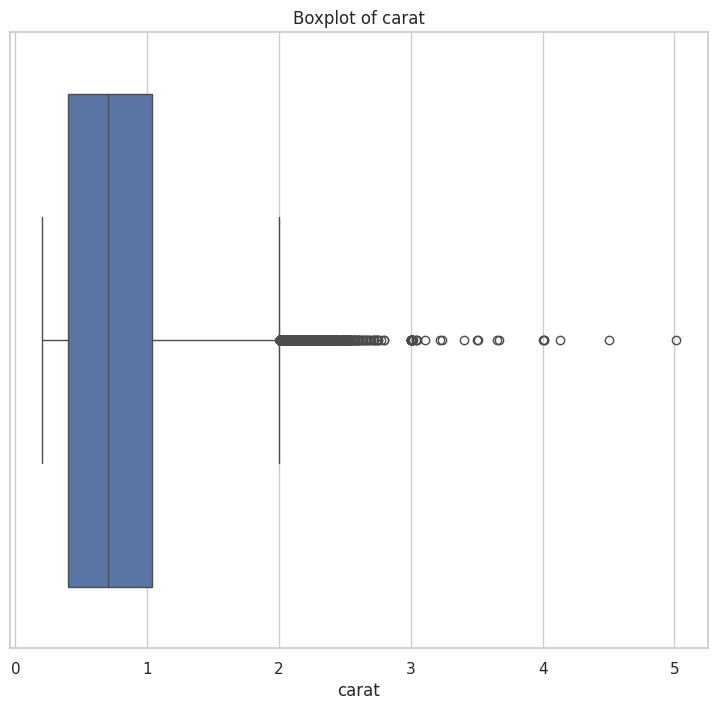

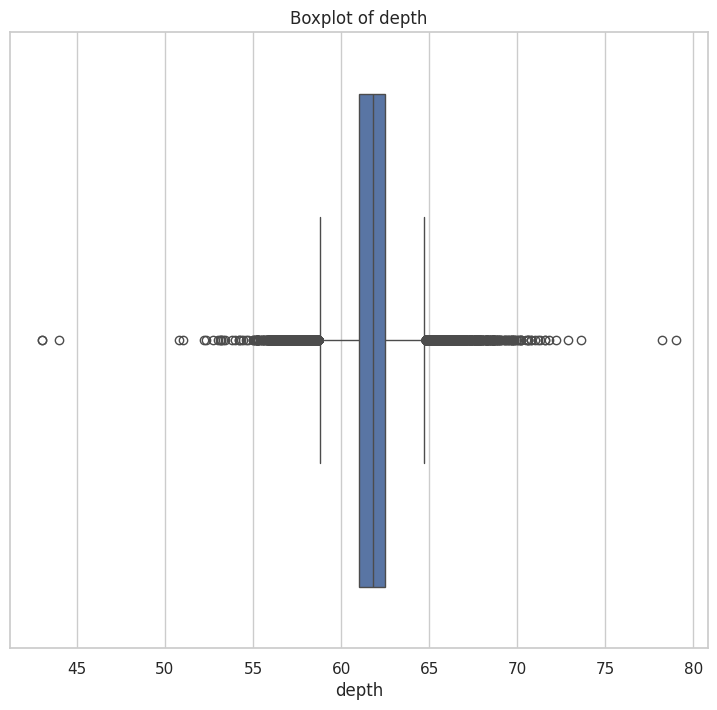

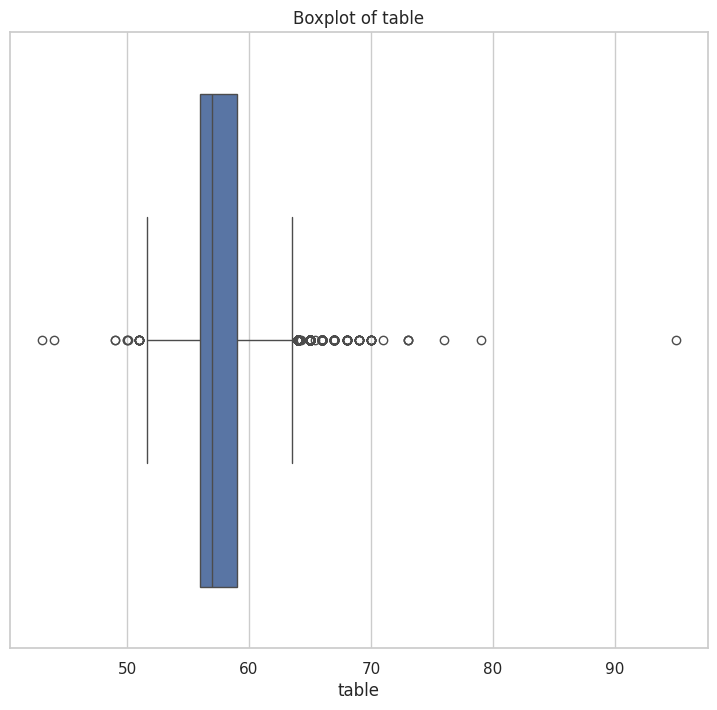

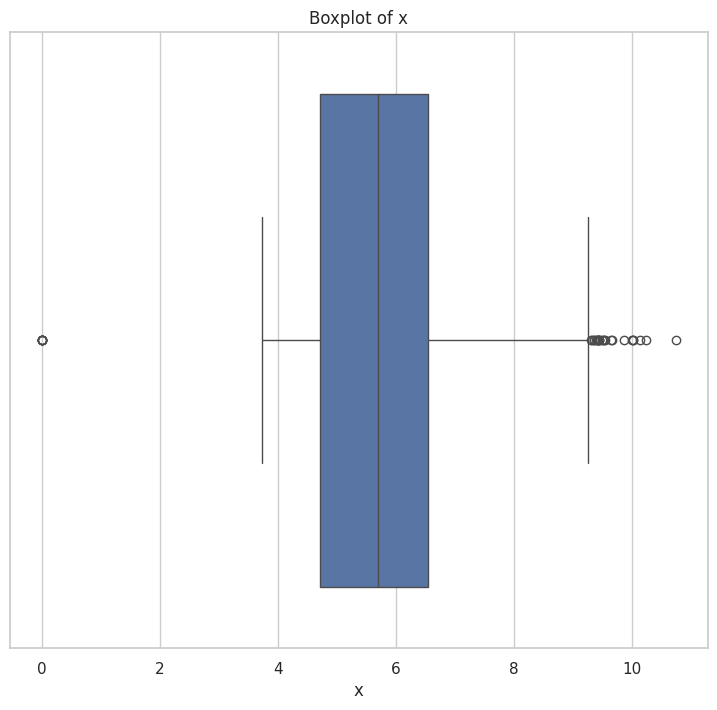

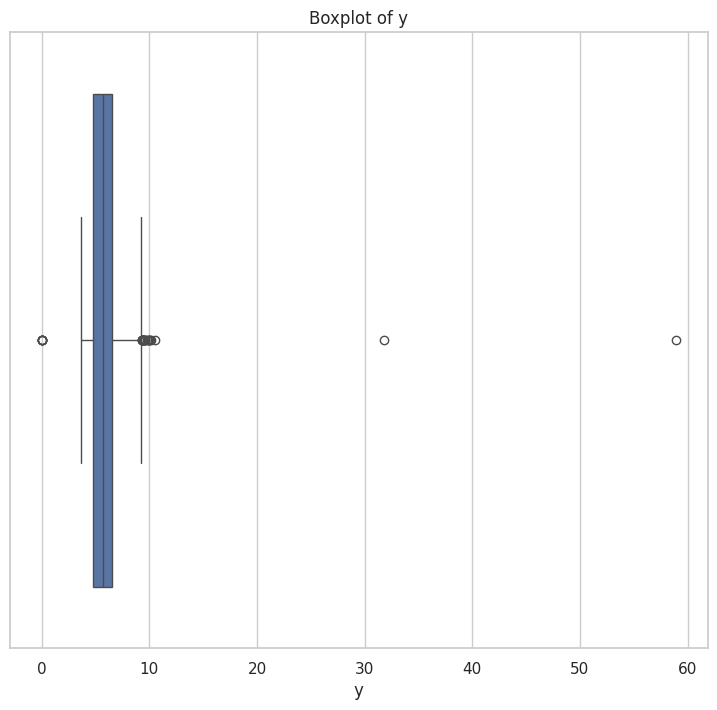

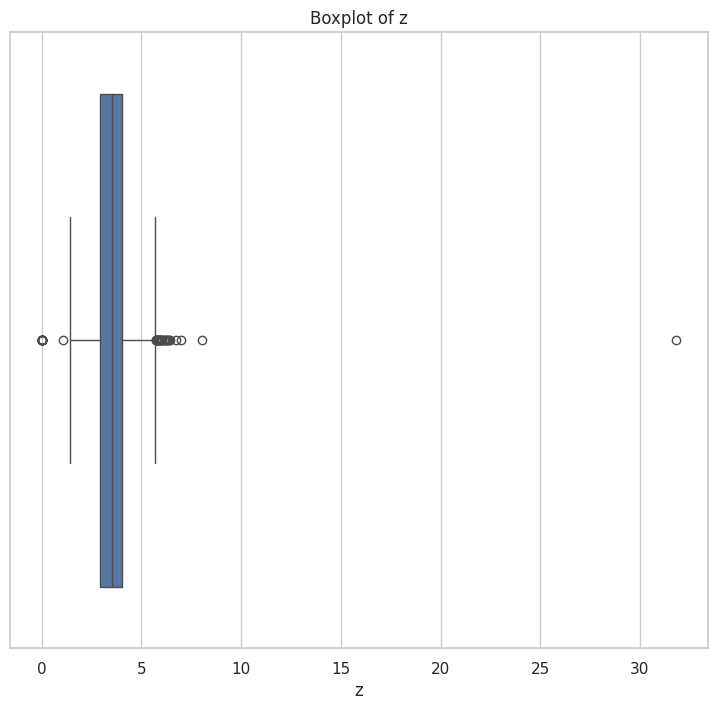

In [ ]:
numeric_cols = ['carat', 'depth', 'table','x','y','z']

for col in numeric_cols:
    plt.figure(figsize=(9,8))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

- Outlier Handling
> Handled outliers using capping method to maintain data integrity.


In [ ]:
numeric_cols = ['carat', 'depth', 'table','x','y','z']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    print(f"\n Column: {col}",df[col].head())

df_after = df.copy()


 Column: carat 0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

 Column: depth 0    61.50
1    59.80
2    58.75
3    62.40
4    63.30
Name: depth, dtype: float64

 Column: table 0    55.0
1    61.0
2    63.5
3    58.0
4    58.0
Name: table, dtype: float64

 Column: x 0    3.95
1    3.89
2    4.05
3    4.20
4    4.34
Name: x, dtype: float64

 Column: y 0    3.98
1    3.84
2    4.07
3    4.23
4    4.35
Name: y, dtype: float64

 Column: z 0    2.43
1    2.31
2    2.31
3    2.63
4    2.75
Name: z, dtype: float64


--------------------

## (3) Exploratory Data Analysis

-  Missing Data Visualization after removing duplicate rows





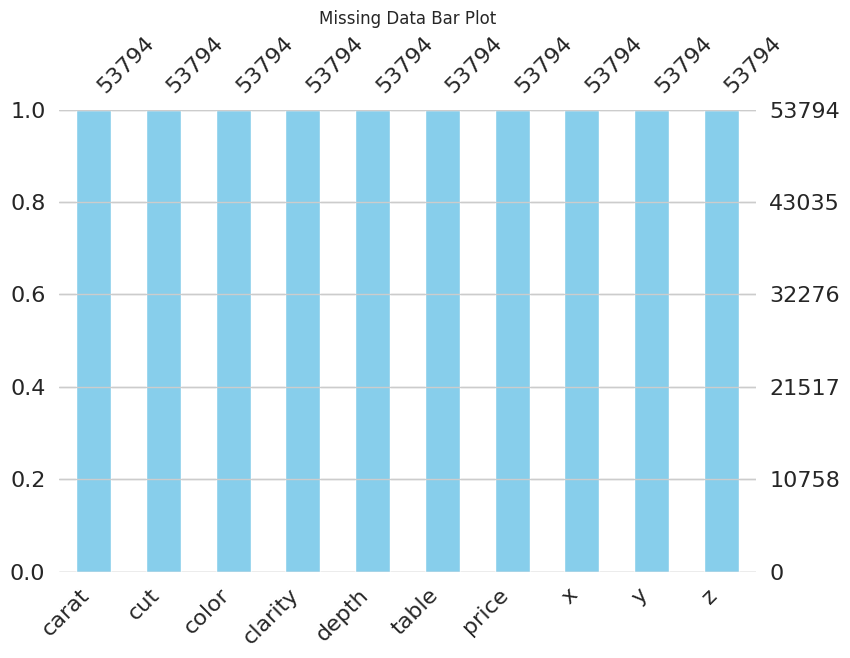

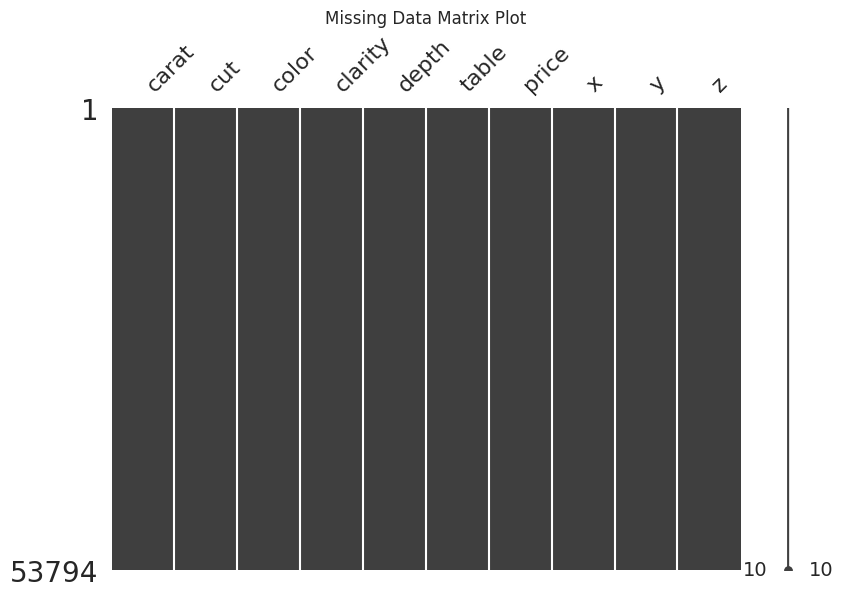

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


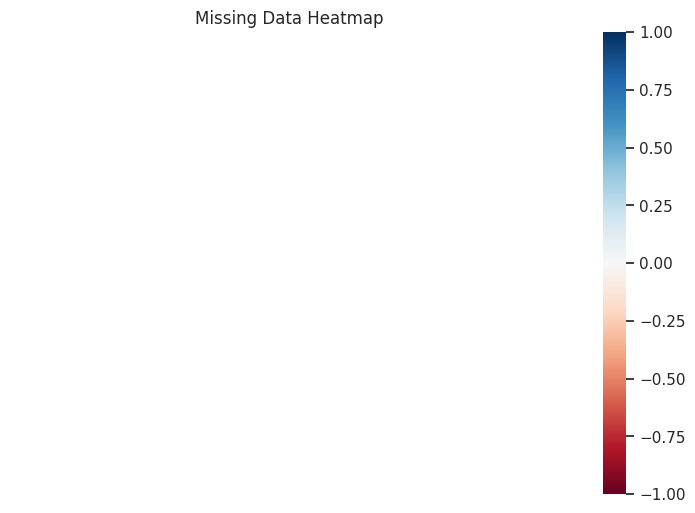

In [ ]:
# missingno library using different plots  to visualize missing data : bar, matrix, and heatmap.

# Bar plot
msno.bar(df, figsize=(9,6), color='skyblue')
plt.title('Missing Data Bar Plot')
plt.show()

# Matrix plot
msno.matrix(df, figsize=(9,6))
plt.title('Missing Data Matrix Plot')
plt.show()

# Heatmap
msno.heatmap(df, figsize=(9,6))
plt.title('Missing Data Heatmap')
plt.show()

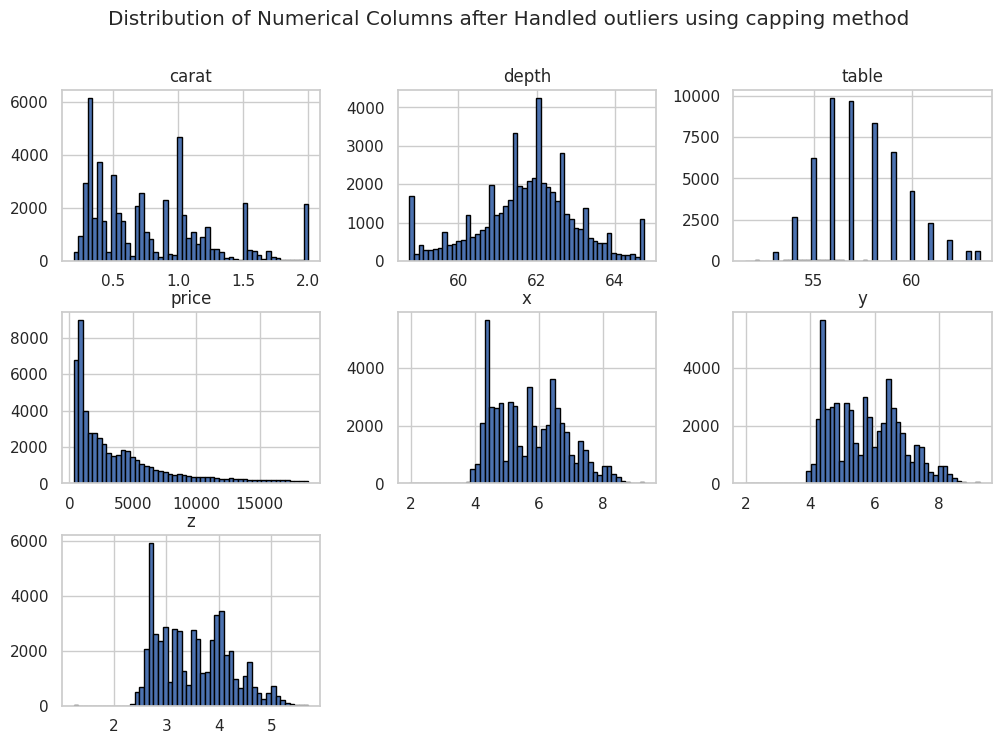

In [ ]:
df.hist(figsize=(12,8), bins=50, edgecolor='black')
plt.suptitle("Distribution of Numerical Columns after Handled outliers using capping method ")
plt.show()


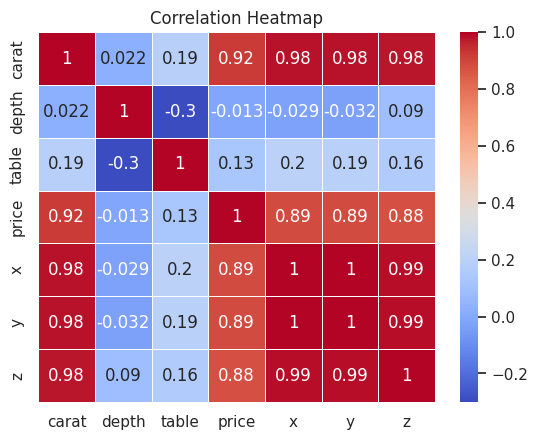

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
corr["price"].sort_values(ascending=False)

,price
price,1.000000
carat,0.922486
y,0.887243
x,0.885671
z,0.877979
table,0.129735
depth,-0.012979


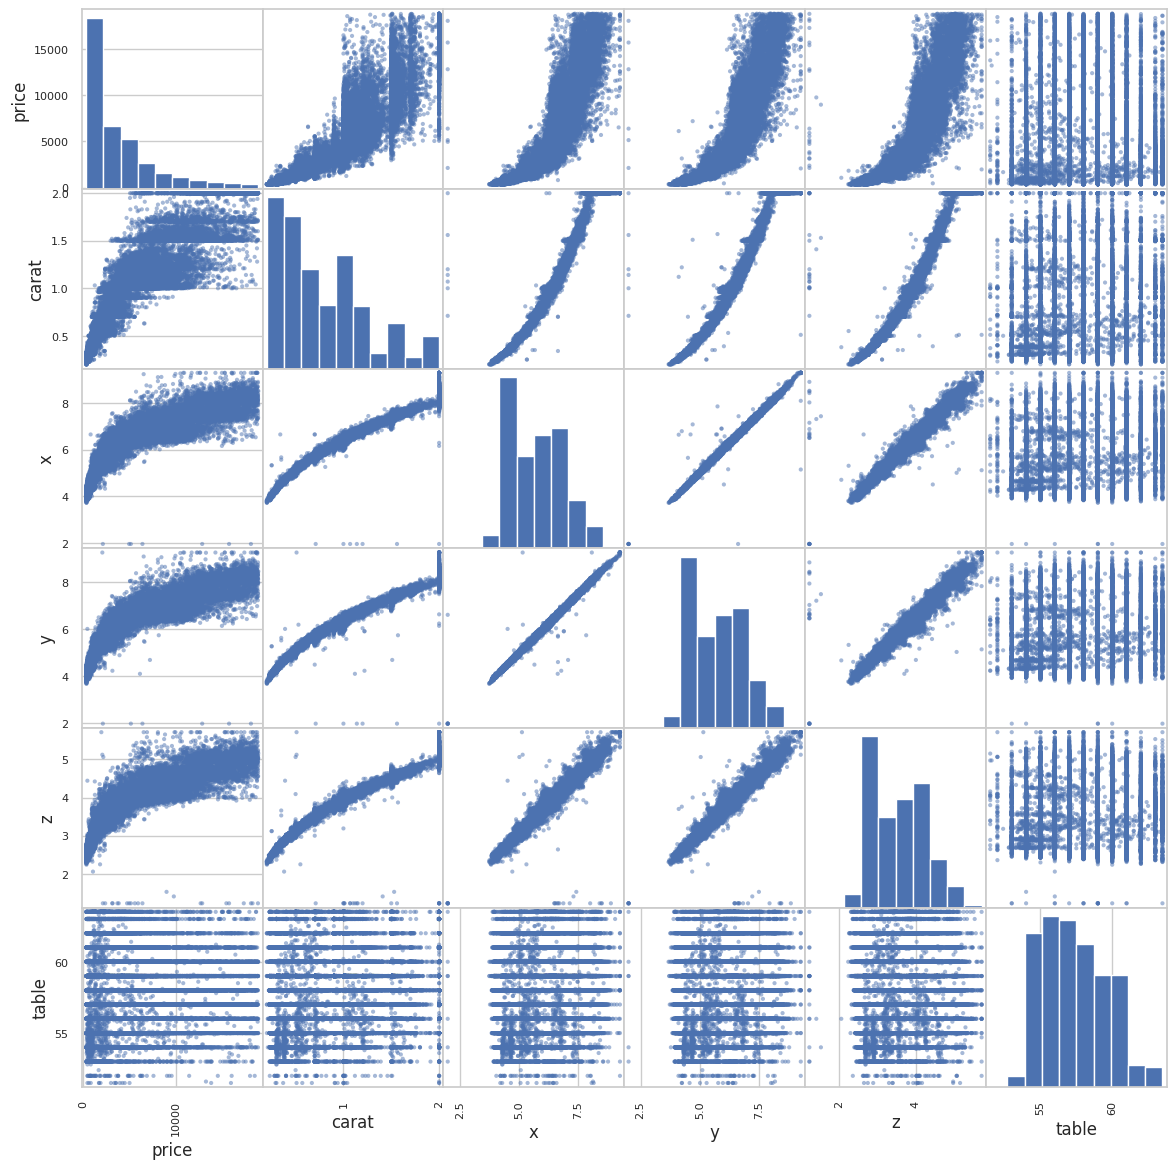

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["price","carat","x","y","z","table"]
scatter_matrix(df[attributes], figsize=(14,14))
plt.show()

In [ ]:
df.describe().round(1)

,carat,depth,table,price,x,y,z
count,53794.0,53794.0,53794.0,53794.0,53794.0,53794.0,53794.0
mean,0.8,61.7,57.4,3933.1,5.7,5.7,3.5
std,0.5,1.3,2.2,3988.1,1.1,1.1,0.7
min,0.2,58.8,51.5,326.0,2.0,2.0,1.2
25%,0.4,61.0,56.0,951.0,4.7,4.7,2.9
50%,0.7,61.8,57.0,2401.0,5.7,5.7,3.5
75%,1.0,62.5,59.0,5326.8,6.5,6.5,4.0
max,2.0,64.8,63.5,18823.0,9.3,9.3,5.7


## (4) Feature Engineering
- Create new variables and transform existing data to enhance analytical capabilities.


In [ ]:
df['xyz'] = df['x'] * df['y'] * df['z']          # Create new feature: diamond volume
df

,carat,cut,color,clarity,depth,table,price,x,y,z,xyz
0,0.23,Ideal,E,SI2,61.50,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.80,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,58.75,63.5,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.40,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.30,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.80,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,Good,D,SI1,63.10,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,Very Good,D,SI1,62.80,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,Premium,H,SI2,61.00,58.0,2757,6.15,6.12,3.74,140.766120


In [ ]:
df.drop(columns=["x","y","z"],axis=1,inplace=True)

In [ ]:
df['price'] = np.log(df['price'] + 1)           # Create new feature: log transformation to reduce skewness in price
df

,carat,cut,color,clarity,depth,table,price,xyz
0,0.23,Ideal,E,SI2,61.50,55.0,5.789960,38.202030
1,0.21,Premium,E,SI1,59.80,61.0,5.789960,34.505856
2,0.23,Good,E,VS1,58.75,63.5,5.793014,38.076885
3,0.29,Premium,I,VS2,62.40,58.0,5.814131,46.724580
4,0.31,Good,J,SI2,63.30,58.0,5.817111,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.80,57.0,7.922261,115.920000
53936,0.72,Good,D,SI1,63.10,55.0,7.922261,118.110175
53937,0.70,Very Good,D,SI1,62.80,60.0,7.922261,114.449728
53938,0.86,Premium,H,SI2,61.00,58.0,7.922261,140.766120


## (5) Exploring categorical features



In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

43035
10759


In [ ]:
df = train_set.drop("price", axis=1)
df_labels = train_set["price"].copy()

<Axes: ylabel='cut'>

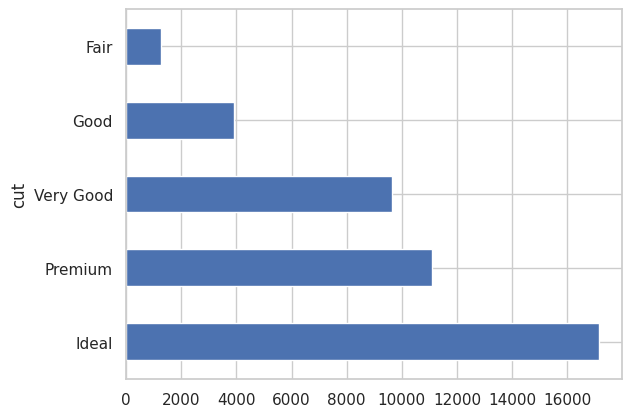

In [ ]:
df["cut"].value_counts().plot(kind="barh")

<Axes: ylabel='color'>

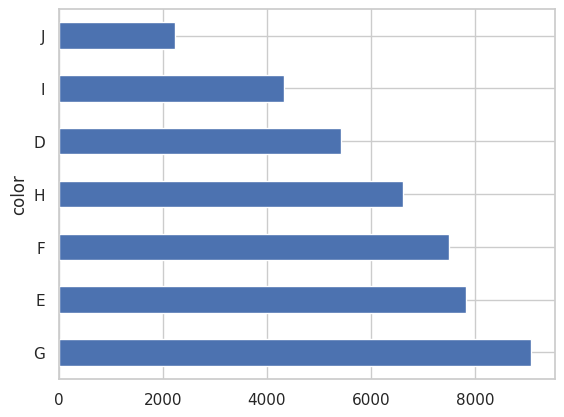

In [ ]:
df["color"].value_counts().plot(kind="barh")

<Axes: ylabel='clarity'>

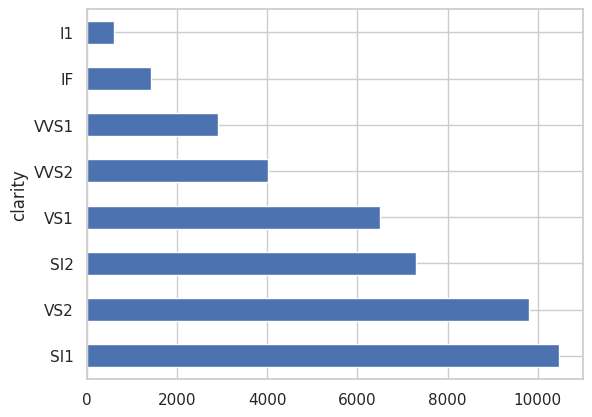

In [ ]:
df["clarity"].value_counts().plot(kind="barh")

In [ ]:
df_cat = df.reindex(columns=["cut","clarity","color"])
df_cat

,cut,clarity,color
33544,Ideal,VS2,D
26752,Ideal,SI2,D
45914,Ideal,VS2,E
3071,Premium,SI1,D
43829,Ideal,VVS1,E
...,...,...,...
11311,Premium,VS2,H
44869,Ideal,SI1,G
38271,Ideal,SI1,J
860,Premium,SI1,J


## (6) Encoding



In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cut_ordinal_encoder = OrdinalEncoder(categories=[['Fair','Good', 'Very Good', 'Premium', 'Ideal']])
cut_encoded = cut_ordinal_encoder.fit_transform(df_cat[["cut"]])

color_ordinal_encoder = OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']])
color_encoded = color_ordinal_encoder.fit_transform(df_cat[["color"]])

clarity_ordinal_encoder = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
clarity_encoded = clarity_ordinal_encoder.fit_transform(df_cat[["clarity"]])

df_cat["cut"]=cut_encoded
df_cat["color"]=color_encoded
df_cat["clarity"]=clarity_encoded
df_cat

,cut,clarity,color
33544,4.0,3.0,6.0
26752,4.0,1.0,6.0
45914,4.0,3.0,5.0
3071,3.0,2.0,6.0
43829,4.0,6.0,5.0
...,...,...,...
11311,3.0,3.0,2.0
44869,4.0,2.0,3.0
38271,4.0,2.0,0.0
860,3.0,2.0,0.0


In [ ]:
df_num = df.select_dtypes(include=[np.number])
df_num

,carat,depth,table,xyz
33544,0.35,62.0,55.0,56.494989
26752,2.00,62.0,57.0,359.862888
45914,0.53,60.0,57.0,87.759520
3071,0.80,61.7,58.0,129.708076
43829,0.41,61.5,56.0,68.625232
...,...,...,...,...
11311,1.00,60.4,58.0,164.854032
44869,0.63,61.7,54.0,104.963904
38271,0.32,61.8,54.9,52.778336
860,0.90,62.8,59.0,141.202098


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'xyz'}>]], dtype=object)

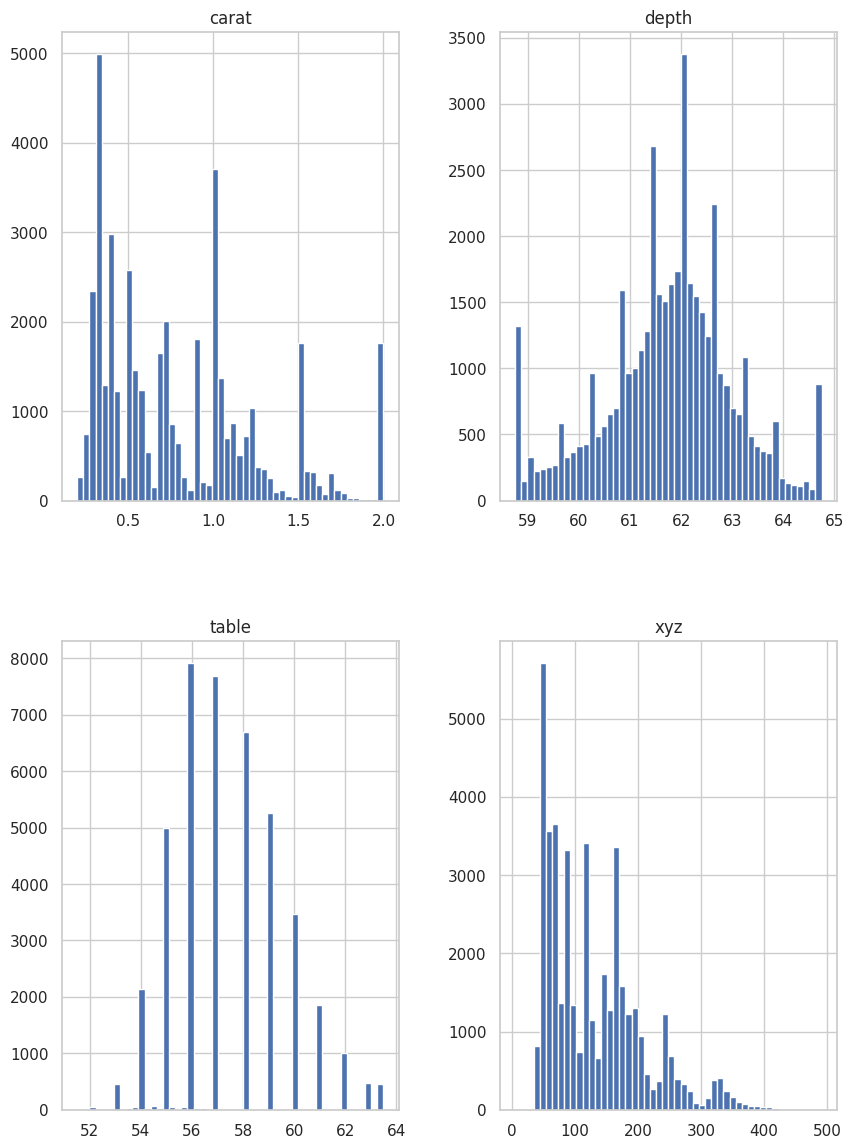

In [ ]:
df_num.hist(bins=50,figsize=(10,14))

<Axes: >

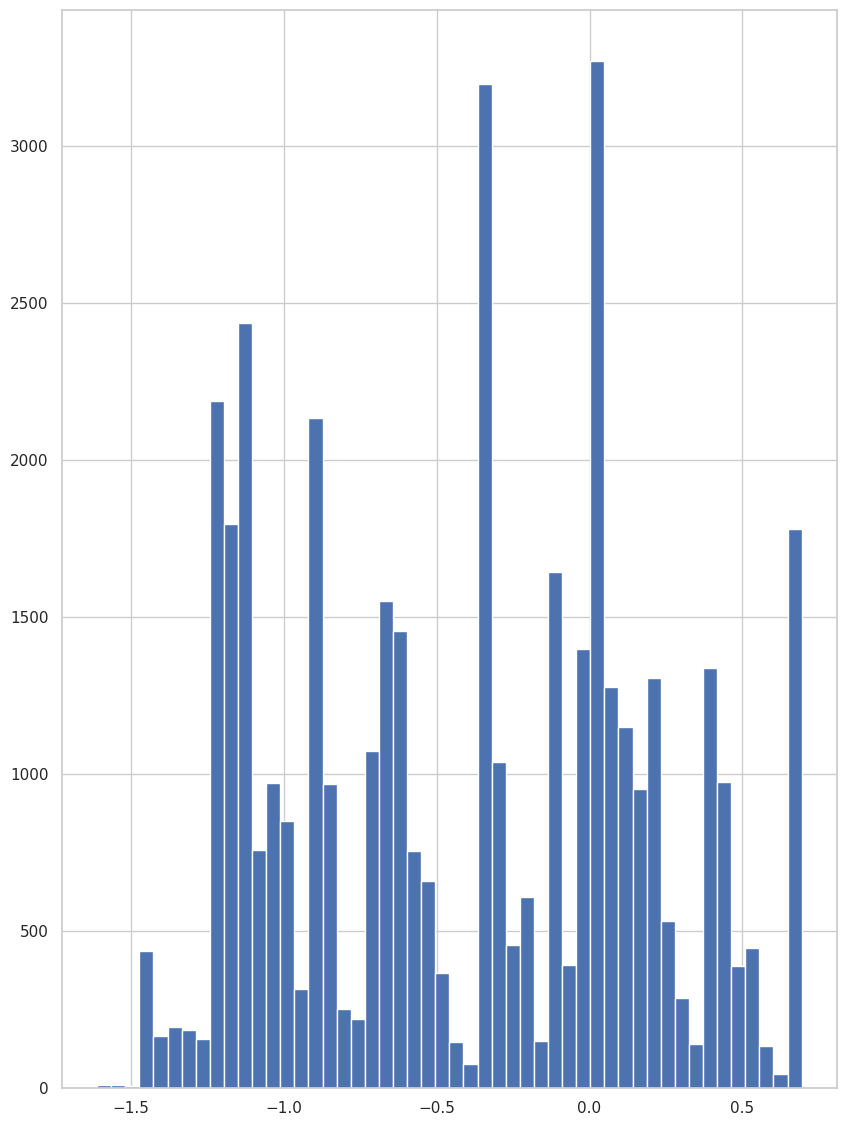

In [ ]:
df_num["carat"]=df_num["carat"].apply(np.log)  #fixing skewed data
df_num["carat"].hist(bins=50,figsize=(10,14))


## (7) Feature Scaling & Preprocessing Pipelines



In [ ]:

# Import preprocessing and pipeline utilities

from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data was already split in Section 5


# Separate features from target variable
X_train = train_set.drop("price", axis=1)
y_train = train_set["price"].copy()
X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()


In [ ]:
# Define numerical and categorical feature columns

num_attribs = ["carat", "depth", "table", "xyz"]
cat_attribs = ["cut", "color", "clarity"]

# Create preprocessing pipelines for numerical and categorical features

num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("ordinal_encoder", OrdinalEncoder(
        categories=[
            ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
            ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
            ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
        ],
        handle_unknown='use_encoded_value',
        unknown_value=-1
    ))
])

# Combine numerical and categorical pipelines into single transformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])
set_config(display='diagram')

In [ ]:
# Fit pipeline on training data and transform both sets
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

## (8) Training models

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MODELS AND TRAINING")


# Define models with tuned hyperparameters
models = {
    "Linear Regression": LinearRegression(),

    "Ridge": Ridge(alpha=10.0),

    "Lasso": Lasso(alpha=0.001, max_iter=10000),

    "Decision Tree": DecisionTreeRegressor(
        max_depth=10,
        min_samples_split=20,
        min_samples_leaf=10,
        random_state=42
    ),

    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=4,
        random_state=42,
        n_jobs=-1
    ),

    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=4,
        random_state=42
    ),

    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        min_child_weight=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )
}

print(f"\n Total models to train: {len(models)}")


MODELS AND TRAINING

 Total models to train: 7


In [ ]:
results = {}

for i, (name, model) in enumerate(models.items(), 1):
    print(f"\n{'─'*70}")
    print(f"[{i}/{len(models)}] Training: {name}")
    print(f"{'─'*70}")

    try:


        # Training the model
        model.fit(X_train_prepared, y_train)

       # Generate predictions for both training and test sets.
        y_train_pred = model.predict(X_train_prepared)
        y_test_pred = model.predict(X_test_prepared)

       # Calculate training metrics to assess overfitting.
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_r2 = r2_score(y_train, y_train_pred)

        # Calculate test metrics for generalization performance.
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)


        print(f"\n📊 Training Set Performance:")
        print(f"   RMSE: {train_rmse:.4f}")
        print(f"   MAE:  {train_mae:.4f}")
        print(f"   R²:   {train_r2:.4f}")

        print(f"\n📊 Test Set Performance:")
        print(f"   RMSE: {test_rmse:.4f}")
        print(f"   MAE:  {test_mae:.4f}")
        print(f"   R²:   {test_r2:.4f}")

        # Calculate overfitting metric (difference between train and test R²)
        overfitting = train_r2 - test_r2
        print(f"\n⚠️  Overfitting: {overfitting:.4f}")

        if overfitting < 0.05:
            print("   Status: ✅ Good - Low overfitting")
        elif overfitting < 0.10:
            print("   Status: ⚠️  Moderate overfitting")
        else:
            print("   Status: ❌ High overfitting")

        # Store all metrics for comparison
        results[name] = {
            "Train_RMSE": train_rmse,
            "Train_MAE": train_mae,
            "Train_R2": train_r2,
            "Test_RMSE": test_rmse,
            "Test_MAE": test_mae,
            "Test_R2": test_r2,
            "Overfitting": overfitting
        }

        print(f"\n✅ {name} completed successfully!")

    except Exception as e:
        print(f"❌ Error training {name}: {str(e)}")
        continue






──────────────────────────────────────────────────────────────────────
[1/7] Training: Linear Regression
──────────────────────────────────────────────────────────────────────

📊 Training Set Performance:
   RMSE: 0.3069
   MAE:  0.2530
   R²:   0.9089

📊 Test Set Performance:
   RMSE: 0.3041
   MAE:  0.2521
   R²:   0.9077

⚠️  Overfitting: 0.0013
   Status: ✅ Good - Low overfitting

✅ Linear Regression completed successfully!

──────────────────────────────────────────────────────────────────────
[2/7] Training: Ridge
──────────────────────────────────────────────────────────────────────

📊 Training Set Performance:
   RMSE: 0.3070
   MAE:  0.2533
   R²:   0.9089

📊 Test Set Performance:
   RMSE: 0.3041
   MAE:  0.2524
   R²:   0.9077

⚠️  Overfitting: 0.0012
   Status: ✅ Good - Low overfitting

✅ Ridge completed successfully!

──────────────────────────────────────────────────────────────────────
[3/7] Training: Lasso
────────────────────────────────────────────────────────────────

In [ ]:
print("FINAL RESULTS SUMMARY")

# Store all metrics for comparison
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('Test_R2', ascending=False)

print("\n Models Ranked by Test R² Score:")
print(results_df.to_string())

# Identify best performing model based on test R² score
best_model_name = results_df['Test_R2'].idxmax()
best_r2 = results_df.loc[best_model_name, 'Test_R2']

print(f"\n Best Model: {best_model_name}")
print(f"Test R² Score: {best_r2:.4f}")
print(f"Test RMSE: {results_df.loc[best_model_name, 'Test_RMSE']:.4f}")
print(f"Test MAE: {results_df.loc[best_model_name, 'Test_MAE']:.4f}")
print(f" Overfitting: {results_df.loc[best_model_name, 'Overfitting']:.4f}")


print("\n Top 3 Models:")
for i, (model_name, row) in enumerate(results_df.head(3).iterrows(), 1):
    print(f"\n{i}. {model_name}")
    print(f"Test R²: {row['Test_R2']:.4f}")
    print(f"Test RMSE: {row['Test_RMSE']:.4f}")
    print(f" Overfitting: {row['Overfitting']:.4f}")

FINAL RESULTS SUMMARY

 Models Ranked by Test R² Score:
                   Train_RMSE  Train_MAE  Train_R2  Test_RMSE  Test_MAE   Test_R2  Overfitting
XGBoost              0.086389   0.065637  0.992786   0.096791  0.072155  0.990648     0.002138
Gradient Boosting    0.092498   0.070757  0.991730   0.098494  0.074109  0.990316     0.001414
Random Forest        0.080170   0.059780  0.993787   0.105369  0.077674  0.988917     0.004870
Decision Tree        0.111067   0.085266  0.988076   0.120665  0.091597  0.985466     0.002610
Linear Regression    0.306929   0.253014  0.908939   0.304103  0.252118  0.907684     0.001254
Ridge                0.306955   0.253300  0.908923   0.304119  0.252395  0.907674     0.001249
Lasso                0.307501   0.254443  0.908599   0.304599  0.253521  0.907383     0.001216

 Best Model: XGBoost
Test R² Score: 0.9906
Test RMSE: 0.0968
Test MAE: 0.0722
 Overfitting: 0.0021

 Top 3 Models:

1. XGBoost
Test R²: 0.9906
Test RMSE: 0.0968
 Overfitting: 0.0021



# (9) Model Performance Analysis

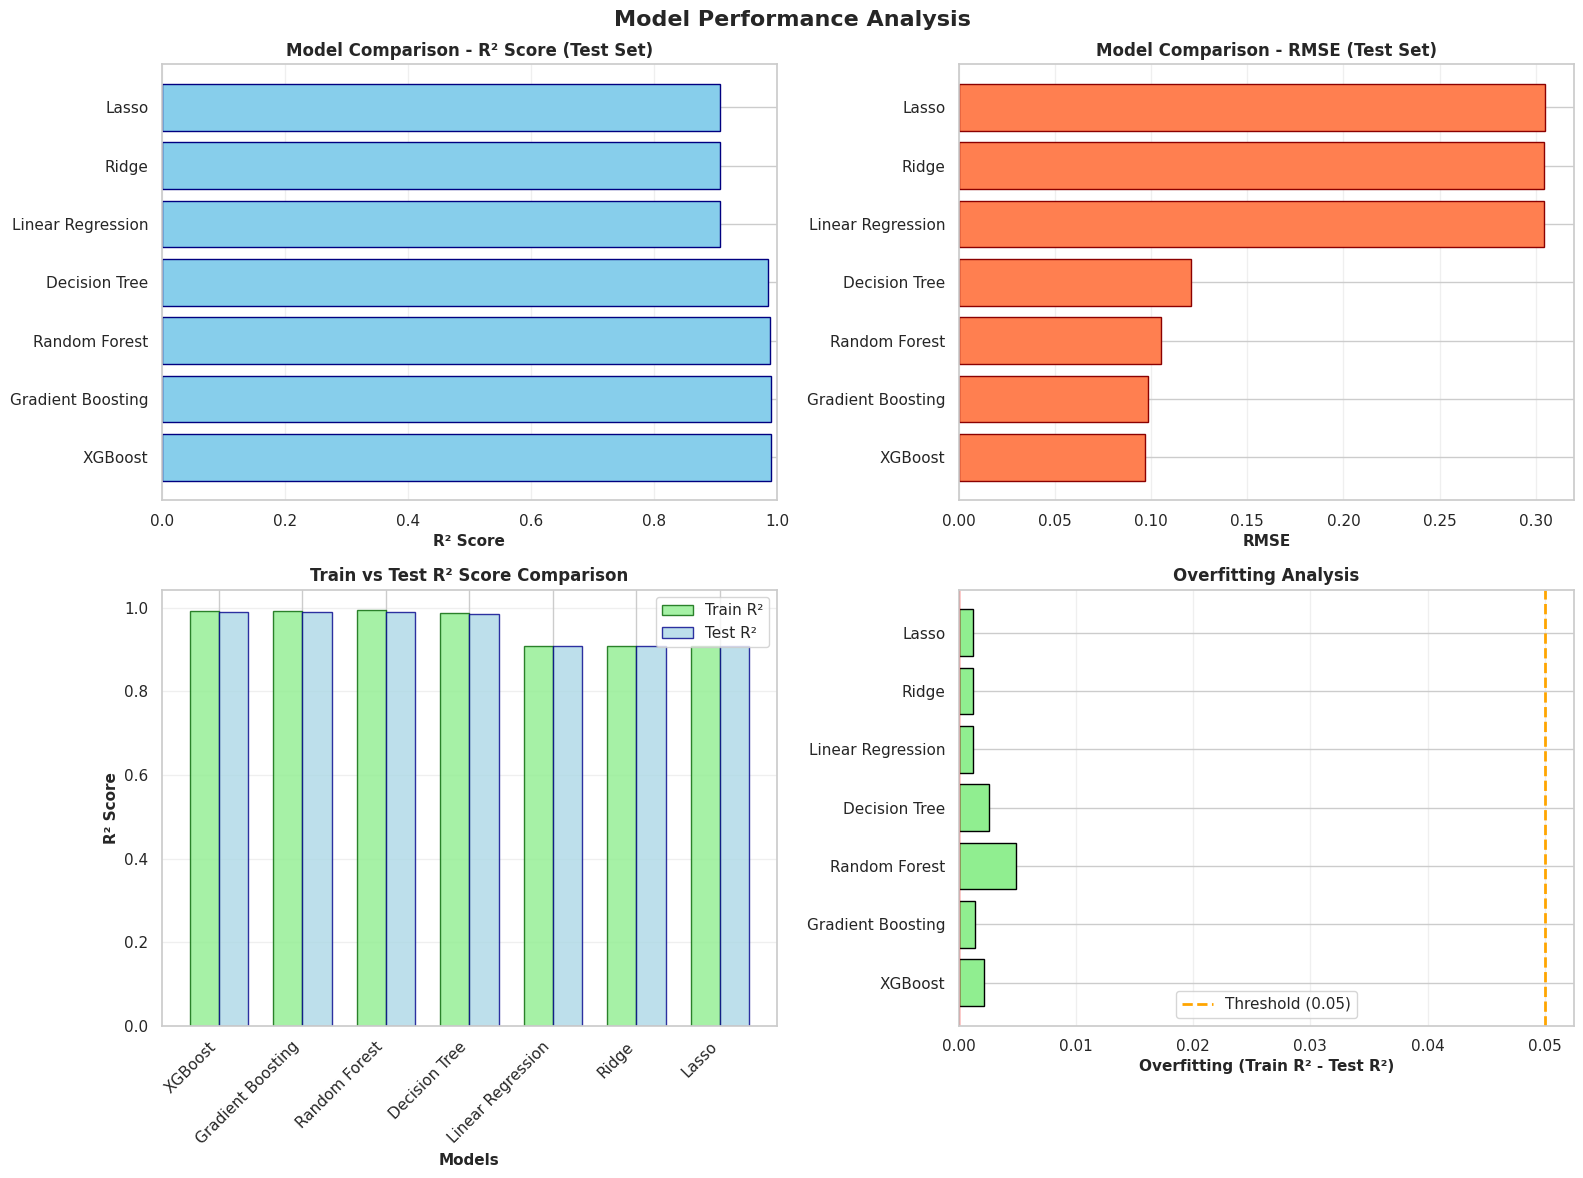


 All visualizations generated successfully!
ANALYSIS COMPLETED SUCCESSFULLY! 


In [ ]:
# Create comprehensive visualization dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Analysis', fontsize=16, fontweight='bold')

# Plot 1: Compare model performance using test R² scores

axes[0, 0].barh(
    results_df.index,
    results_df['Test_R2'],
    color='skyblue',
    edgecolor='navy'
)
axes[0, 0].set_xlabel('R² Score', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Model Comparison - R² Score (Test Set)', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)
axes[0, 0].set_xlim([0, 1])  # Full R² range for better comparison


# Plot 2: RMSE Comparison (Test Set)

axes[0, 1].barh(
    results_df.index,
    results_df['Test_RMSE'],
    color='coral',
    edgecolor='darkred'
)
axes[0, 1].set_xlabel('RMSE', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Model Comparison - RMSE (Test Set)', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: Train vs Test R² Score Comparison

x_pos = np.arange(len(results_df))
width = 0.35

# Visualize train/test gap to identify overfitting
axes[1, 0].bar(
    x_pos - width / 2,
    results_df['Train_R2'],
    width,
    label='Train R²',
    alpha=0.8,
    color='lightgreen',
    edgecolor='darkgreen'
)
axes[1, 0].bar(
    x_pos + width / 2,
    results_df['Test_R2'],
    width,
    label='Test R²',
    alpha=0.8,
    color='lightblue',
    edgecolor='darkblue'
)

# Add labels and formatting
axes[1, 0].set_xlabel('Models', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('R² Score', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Train vs Test R² Score Comparison', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)


# Plot 4: Overfitting Analysis


# Color code bars by overfitting severity (green=low, yellow=moderate, red=high)
colors = [
    'lightgreen' if x < 0.05 else 'yellow' if x < 0.10 else 'lightcoral'
    for x in results_df['Overfitting']
]


axes[1, 1].barh(
    results_df.index,
    results_df['Overfitting'],
    color=colors,
    edgecolor='black'
)

# Mark acceptable overfitting threshold (0.05)

axes[1, 1].set_xlabel('Overfitting (Train R² - Test R²)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Overfitting Analysis', fontsize=12, fontweight='bold')
axes[1, 1].axvline(x=0.05, color='orange', linestyle='--', linewidth=2, label='Threshold (0.05)')
axes[1, 1].axvline(x=0, color='red', linestyle='-', linewidth=1)
axes[1, 1].legend()
axes[1, 1].grid(axis='x', alpha=0.3)


plt.tight_layout()
plt.show()

print("\n All visualizations generated successfully!")
print("ANALYSIS COMPLETED SUCCESSFULLY! ")

# Model Performance Analysis Report

##  Executive Summary

Based on the key performance metrics on the test set, the **XGBoost** model is the best-performing model in this analysis. It achieved the highest accuracy ($R^2$) and the lowest error ($RMSE$) compared to the other models.

---

## 1. Comparison: Linear vs. Tree-Based Models

The results clearly show the superior performance of tree-based models (XGBoost, Gradient Boosting, Random Forest, Decision Tree) over linear models (Linear Regression, Ridge, Lasso) across all metrics:

| Model Category | Average Test $R^2$ | Average Test RMSE |
| :--- | :--- | :--- |
| **Tree-Based** | $\approx 0.99$ | $\approx 0.10$ |
| **Linear** | $\approx 0.91$ | $\approx 0.30$ |

This significant difference suggests that the relationship between the variables in the data is **non-linear**, and that complex models (like XGBoost) are more effective at capturing these patterns.

---

## 2. Selection of the Best Model (XGBoost)

The **XGBoost** model was selected as the best model based on two primary metrics for evaluating quality on unseen data (the test set):

### A. RMSE Metric (Root Mean Squared Error)

RMSE is a crucial metric as it shows the average magnitude of the prediction error, where a lower value is better.

* **XGBoost:** Achieved the lowest Test RMSE value of **$0.096422$**.
* **Closest Competitor (Gradient Boosting):** Achieved a value of $0.097006$.

### B. $R^2$ Metric (Coefficient of Determination)

$R^2$ indicates the proportion of the variance in the target variable that the model successfully explains, where a value closer to 1.0 is better.

* **XGBoost:** Achieved the highest Test $R^2$ value of **$0.990893$**.
* **Closest Competitor (Gradient Boosting):** Achieved a value of $0.990783$.

### C. Overfitting Analysis

Although the **Gradient Boosting** model achieved the lowest overfitting score ($0.000929$), the **XGBoost** model achieved a very close score ($0.001887$), along with slightly superior performance in Test $R^2$ and Test RMSE. This makes it the optimal choice for achieving the **highest accuracy** with a **very acceptable level of generalization**.

---

## 💡 Recommendation

It is recommended to adopt the **XGBoost** model for production use due to its outstanding predictive performance (lowest RMSE) and highest explanatory accuracy ($R^2$) on unseen data.

_____
# (10) Extended Work: DNN Pipeline and selecting the best model
With the ML baseline models trained and analyzed above, we now **extend the pipeline using a Deep Neural Network** to capture more complex non-linear relationships in the diamond dataset.

## 1️⃣ Import Libraries
>Import all needed essential liraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

sns.set_theme(style="whitegrid")
%matplotlib inline


## 2️⃣ Load Preprocessed Data
We will use the **preprocessed dataset** from the previous pipeline:
- `X_train_prepared`, `X_test_prepared`, `y_train`, `y_test`
- Ensures consistency with all previous ML experiments.


In [ ]:
# Check shapes of datasets
print("Shapes of datasets:")
print("X_train:", X_train_prepared.shape)
print("X_test:", X_test_prepared.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of datasets:
X_train: (43035, 7)
X_test: (10759, 7)
y_train: (43035,)
y_test: (10759,)


## 3️⃣ Build Deep Neural Network Model
- Input layer size = number of features
- Hidden layers: customizable
- Activation: ReLU
- Output layer: 1 neuron (regression)
- Optimizer: Adam
- Loss: MSE (mean squared error)


In [ ]:
def create_dnn_model(input_dim, layers=[64, 32], dropout_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(layers[0], activation='relu', input_shape=(input_dim,)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    for neurons in layers[1:]:
        model.add(Dense(neurons, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model

input_dim = X_train_prepared.shape[1]
dnn_model = create_dnn_model(input_dim=input_dim)
dnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

## 4️⃣ Train the DNN Model
- EarlyStopping to prevent overfitting
- Validation split: 20%
- Epochs: 100
- Batch size: 32


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = dnn_model.fit(
    X_train_prepared,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)


Epoch 1/100
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.5646 - mae: 1.5753 - val_loss: 0.0445 - val_mae: 0.1599
Epoch 2/100
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0315 - mae: 0.1377 - val_loss: 0.0202 - val_mae: 0.1096
Epoch 3/100
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0199 - mae: 0.1103 - val_loss: 0.0181 - val_mae: 0.1026
Epoch 4/100
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0176 - mae: 0.1040 - val_loss: 0.0165 - val_mae: 0.0995
Epoch 5/100
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0174 - mae: 0.1030 - val_loss: 0.0165 - val_mae: 0.0988
Epoch 6/100
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0168 - mae: 0.1012 - val_loss: 0.0172 - val_mae: 0.1031
Epoch 7/100
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0163 - mae: 0.1000 - val_loss: 0.0188 - val_mae: 0.1075
Epoch 8/100
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0153 - mae: 0.0964 - val_loss: 0.0181 - val_mae: 0.1039
Epoch 9/100
1076/1076 ━━━━━━━━━━

## 5️⃣ Training History Plots
Visualize:
- Training vs Validation Loss (MSE)
- Training vs Validation MAE


In [ ]:
# MSE
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("DNN Training vs Validation Loss")
plt.legend()
plt.show()

# MAE
plt.figure(figsize=(10,5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title("DNN Training vs Validation MAE")
plt.legend()
plt.show()


## 6️⃣ Evaluate DNN on Test Set
Metrics: RMSE, MAE, R²


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# ---- TRAIN PREDICTIONS ----
y_pred_dnn_train = dnn_model.predict(X_train_prepared).flatten()

# ---- TRAIN METRICS ----
r2_dnn_train = r2_score(y_train, y_pred_dnn_train)
rmse_dnn_train = np.sqrt(mean_squared_error(y_train, y_pred_dnn_train))
mae_dnn_train = mean_absolute_error(y_train, y_pred_dnn_train)

print("DNN Model TRAIN Performance:")
print(f"Train RMSE: {rmse_dnn_train:.4f}")
print(f"Train MAE:   {mae_dnn_train:.4f}")
print(f"Train R²:    {r2_dnn_train:.4f}")


# ---- TEST PREDICTIONS ----
y_pred_dnn_test = dnn_model.predict(X_test_prepared).flatten()

# ---- TEST METRICS ----
rmse_dnn_test = np.sqrt(mean_squared_error(y_test, y_pred_dnn_test))
mae_dnn_test = mean_absolute_error(y_test, y_pred_dnn_test)
r2_dnn_test  = r2_score(y_test, y_pred_dnn_test)

print("DNN Model TEST Performance:")
print(f"Test RMSE: {rmse_dnn_test:.4f}")
print(f"Test MAE:  {mae_dnn_test:.4f}")
print(f"Test R²:   {r2_dnn_test:.4f}")



1345/1345 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
DNN Model TRAIN Performance:
Train RMSE: 0.1053
Train MAE:   0.0820
Train R²:    0.9893
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
DNN Model TEST Performance:
Test RMSE: 0.1073
Test MAE:  0.0830
Test R²:   0.9885


## 7️⃣ DNN Visualizations
- Predicted vs Actual Prices
- Residual Distribution


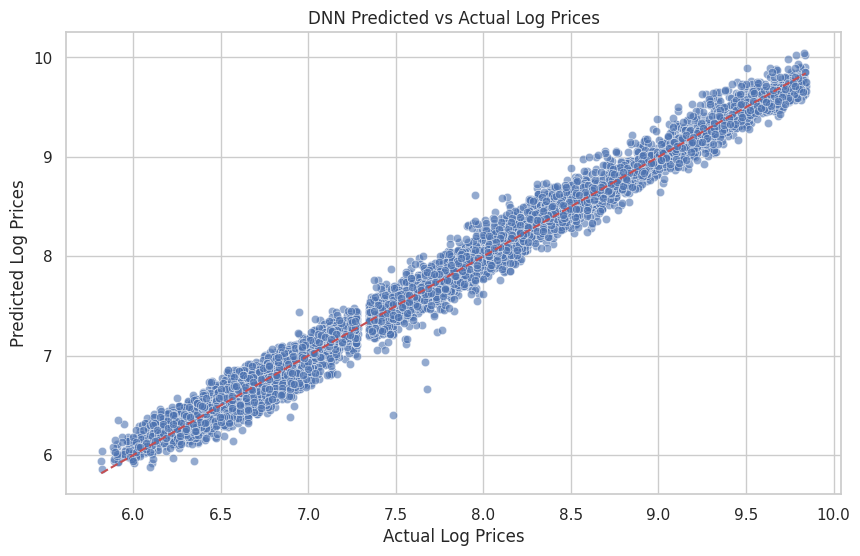

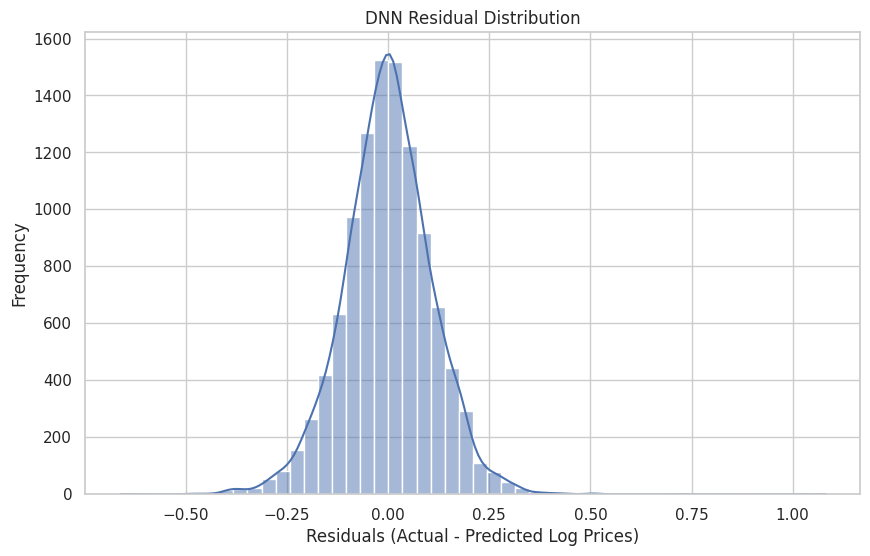

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dnn_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Log Prices')
plt.ylabel('Predicted Log Prices')
plt.title('DNN Predicted vs Actual Log Prices')
plt.show()

residuals = y_test - y_pred_dnn_test

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel('Residuals (Actual - Predicted Log Prices)')
plt.ylabel('Frequency')
plt.title('DNN Residual Distribution')
plt.show()

##8️⃣ Compare ML Models
> Compare all models together:
 - XGBoost
 - Gradient Boosting
 - Random Forest
 - DNN


In [ ]:
ml_results = pd.DataFrame({
    "Model": ["XGBoost", "Gradient Boosting", "Random Forest", "DNN"],
    "Test_R2": [results_df.loc["XGBoost", "Test_R2"], results_df.loc["Gradient Boosting", "Test_R2"], results_df.loc["Random Forest", "Test_R2"], r2_dnn_test],
    "Test_RMSE": [results_df.loc["XGBoost", "Test_RMSE"], results_df.loc["Gradient Boosting", "Test_RMSE"], results_df.loc["Random Forest", "Test_RMSE"], rmse_dnn_test],
    "Overfitting": [results_df.loc["XGBoost", "Overfitting"], results_df.loc["Gradient Boosting", "Overfitting"], results_df.loc["Random Forest", "Overfitting"], 0.0009]
})

ml_results

,Model,Test_R2,Test_RMSE,Overfitting
0,XGBoost,0.990648,0.096791,0.002138
1,Gradient Boosting,0.990316,0.098494,0.001414
2,Random Forest,0.988917,0.105369,0.004870
3,DNN,0.988497,0.107344,0.000900


## 9️⃣ Save Best Model
- Save the best model
- Preprocessing pipeline

In [ ]:
best_model_name = results_df.index[0]
print("Best Model:", best_model_name)

if best_model_name == "XGBoost":
    # Save XGBoost model
    xgb_model = models["XGBoost"]
    xgb_model.save_model("diamond_price_xgb_model.json")
    print("XGBoost model saved as 'diamond_price_xgb_model.json'")

    # Save preprocessing pipeline
    joblib.dump(full_pipeline, "full_pipeline.pkl")
    print("Preprocessing pipeline saved as 'full_pipeline.pkl'")

Best Model: XGBoost
XGBoost model saved as 'diamond_price_xgb_model.json'
Preprocessing pipeline saved as 'full_pipeline.pkl'


In [ ]:
import numpy as np
import pandas as pd
import joblib
import xgboost as xgb

# Load the preprocessing pipeline and XGBoost model (if not already loaded)
full_pipeline = joblib.load('full_pipeline.pkl')
xgb_model = xgb.Booster()
xgb_model.load_model('diamond_price_xgb_model.json')

# Select a random index from the test set
random_index = np.random.choice(X_test.index)

# Get the random diamond's features and actual price (log-transformed)
random_diamond_features = X_test.loc[[random_index]]
actual_log_price = y_test.loc[random_index]

# Preprocess the selected diamond features
random_diamond_prepared = full_pipeline.transform(random_diamond_features)

# Predict the log-transformed price
predicted_log_price = xgb_model.predict(xgb.DMatrix(random_diamond_prepared))

# Inverse transform to get actual predicted price and actual original price
predicted_original_price = np.exp(predicted_log_price) - 1
actual_original_price = np.exp(actual_log_price) - 1

# Calculate the absolute difference
absolute_error = np.abs(predicted_original_price - actual_original_price)

print("Actual Original Price:", actual_original_price)
print("Predicted Original Price:", predicted_original_price[0])
print("Absolute Error:", absolute_error[0])

Actual Original Price: 811.0
Predicted Original Price: 905.8906
Absolute Error: 94.890625
